In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split

DATA_DIR = '../../data/'
print(os.listdir(DATA_DIR))

['CleanLoLMatchHistory2.csv', '.DS_Store', 'LoLMatchHistory.txt', 'CleanLoLMatchHistory.csv', 'LoL Match Making Statistics.ipynb', 'LolUpdatedStats.txt', 'CleanLoLMatchHistoryUpdate.csv']


In [2]:
filename = DATA_DIR + 'CleanLoLMatchHistory2.csv'
df = pd.read_csv(filename)
df

,Level,Champion,Score,Game Mode,Creep Score,Gold,Minutes,Date,Rank,Experience Gained,Kills,Deaths,Assists,Game Status
0,15,Vayne,C / +188 XP,Summoner's Rift,169,9.8k,33:44:00,10/14/2018,C,188,3,6,6,-1
1,16,Shen,B- / +223 XP,Summoner's Rift,144,11.8k,40:20:00,10/13/2018,B-,223,5,7,15,-1
2,12,Shen,A-,Summoner's Rift,39,6.2k,25:50:00,10/13/2018,A-,0,0,0,13,1
3,12,Vayne,A+ / +146 XP,Summoner's Rift,137,9.9k,21:05,10/13/2018,A+,146,9,2,8,1
4,12,Vayne,B+ / +144 XP,Summoner's Rift,86,8.4k,20:53,10/13/2018,B+,144,6,2,6,1
5,12,Shen,+557 XP,Summoner's Rift,28,7.7k,22:50,10/13/2018,NaN,557,3,2,12,1
6,8,Vayne,C- / +100 XP,Summoner's Rift,78,4.3k,17:34,10/13/2018,C-,100,0,5,0,-1
7,15,Vayne,A-,Summoner's Rift,124,14.8k,30:23:00,10/13/2018,A-,0,20,3,6,1
8,13,Thresh,NaN,Custom,41,8.3k,37:01:00,10/12/2018,NaN,0,0,8,11,-1
9,17,Vayne,NaN,Custom,269,19.0k,35:28:00,10/12/2018,NaN,0,16,6,7,1


In [3]:
df.describe()

,Level,Creep Score,Experience Gained,Kills,Deaths,Assists,Game Status
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,12.732143,88.071429,167.357143,6.553571,4.785714,8.517857,0.089286
std,3.381721,62.953044,158.806506,6.429816,3.137540,6.633225,0.995933
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,11.000000,34.000000,100.750000,2.000000,2.000000,4.000000,-1.000000
50%,12.500000,82.500000,150.000000,4.500000,5.000000,7.000000,1.000000
75%,15.250000,127.250000,198.250000,9.000000,8.000000,12.000000,1.000000
max,18.000000,269.000000,930.000000,25.000000,11.000000,31.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 14 columns):
Level                56 non-null int64
Champion             56 non-null object
Score                52 non-null object
Game Mode            56 non-null object
Creep Score          56 non-null int64
Gold                 56 non-null object
Minutes              56 non-null object
Date                 56 non-null object
Rank                 45 non-null object
Experience Gained    56 non-null int64
Kills                56 non-null int64
Deaths               56 non-null int64
Assists              56 non-null int64
Game Status          56 non-null int64
dtypes: int64(7), object(7)
memory usage: 6.2+ KB


In [5]:
def parse_gold(x):
    if('k' in x):
        x = x.replace('k','')
        return float(x) * 1000
    else:
        return float(x)

df.columns = df.columns.str.lower().str.replace(' ', '_')
df['gold'] = df['gold'].apply(parse_gold)


In [6]:
df

,level,champion,score,game_mode,creep_score,gold,minutes,date,rank,experience_gained,kills,deaths,assists,game_status
0,15,Vayne,C / +188 XP,Summoner's Rift,169,9800.0,33:44:00,10/14/2018,C,188,3,6,6,-1
1,16,Shen,B- / +223 XP,Summoner's Rift,144,11800.0,40:20:00,10/13/2018,B-,223,5,7,15,-1
2,12,Shen,A-,Summoner's Rift,39,6200.0,25:50:00,10/13/2018,A-,0,0,0,13,1
3,12,Vayne,A+ / +146 XP,Summoner's Rift,137,9900.0,21:05,10/13/2018,A+,146,9,2,8,1
4,12,Vayne,B+ / +144 XP,Summoner's Rift,86,8400.0,20:53,10/13/2018,B+,144,6,2,6,1
5,12,Shen,+557 XP,Summoner's Rift,28,7700.0,22:50,10/13/2018,NaN,557,3,2,12,1
6,8,Vayne,C- / +100 XP,Summoner's Rift,78,4300.0,17:34,10/13/2018,C-,100,0,5,0,-1
7,15,Vayne,A-,Summoner's Rift,124,14800.0,30:23:00,10/13/2018,A-,0,20,3,6,1
8,13,Thresh,NaN,Custom,41,8300.0,37:01:00,10/12/2018,NaN,0,0,8,11,-1
9,17,Vayne,NaN,Custom,269,19000.0,35:28:00,10/12/2018,NaN,0,16,6,7,1


In [34]:
def get_KDA(kills, deaths, assists):
    deaths = [x if x != 0 else 1 for x in deaths]
    return (kills + assists) / deaths

df['kda'] = get_KDA(df['kills'].values, df['assists'], df['deaths'])

np.mean(df['kda'])

2.655347943753396

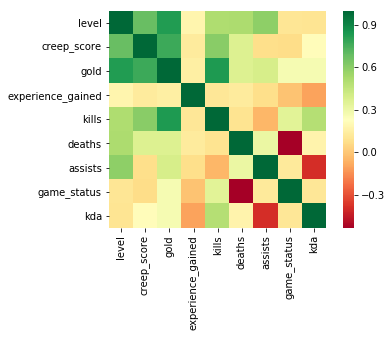

In [35]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')
plt.show()

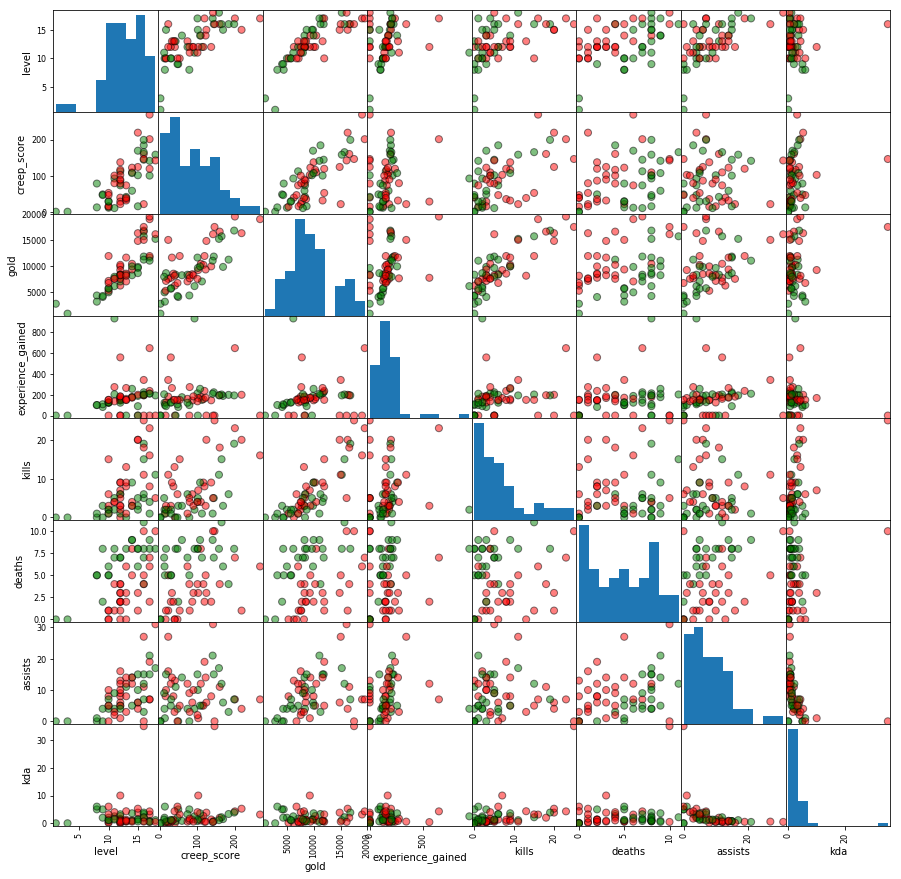

In [36]:
color_list = ['red' if i== 1 else 'green' for i in df.loc[:,'game_status']]
pd.plotting.scatter_matrix(df.loc[:, df.columns != 'game_status'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 200,
                                       edgecolor= "black")
plt.show()

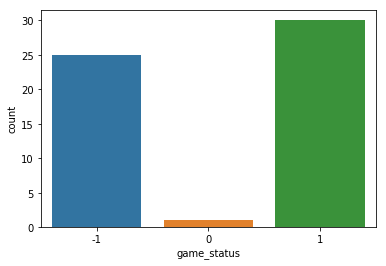

In [9]:
sns.countplot(x="game_status", data=df)
df.loc[:,'game_status'].value_counts()
plt.show()

In [11]:
# df.info()
#df_parsed = df[['level','creep_score','gold','experience_gained','kills','deaths','assists','game_status']]
#df_parsed = df[['kills','deaths','assists','level','game_status',]]
df_parsed = df[['kills','deaths','game_status']]
df_parsed.head()

,kills,deaths,game_status
0,3,6,-1
1,5,7,-1
2,0,0,1
3,9,2,1
4,6,2,1


In [12]:
df_parsed.head()

,kills,deaths,game_status
0,3,6,-1
1,5,7,-1
2,0,0,1
3,9,2,1
4,6,2,1


In [13]:
def get_status(n):
    if n == 1:
        return 'Win'
    elif n == 0:
        return 'Draw'
    elif n == -1:
        return 'Lose'
    
df_parsed['game_status'] = df_parsed['game_status'].apply(get_status)
df_parsed.head()

/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,kills,deaths,game_status
0,3,6,Lose
1,5,7,Lose
2,0,0,Win
3,9,2,Win
4,6,2,Win


In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df_parsed.loc[:,df_parsed.columns != 'game_status'], df_parsed.loc[:,'game_status']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Lose' 'Lose' 'Draw' 'Win' 'Win' 'Win' 'Lose' 'Win' 'Lose' 'Win' 'Win'
 'Lose' 'Lose' 'Win' 'Win' 'Lose' 'Win' 'Lose' 'Win' 'Win' 'Win' 'Win'
 'Win' 'Lose' 'Win' 'Lose' 'Lose' 'Lose' 'Win' 'Lose' 'Win' 'Lose' 'Draw'
 'Lose' 'Lose' 'Win' 'Lose' 'Win' 'Lose' 'Win' 'Win' 'Lose' 'Win' 'Win'
 'Win' 'Lose' 'Lose' 'Lose' 'Win' 'Lose' 'Lose' 'Draw' 'Win' 'Win' 'Win'
 'Win']


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df_parsed.loc[:,df_parsed.columns != 'game_status'], df_parsed.loc[:,'game_status']
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.8823529411764706


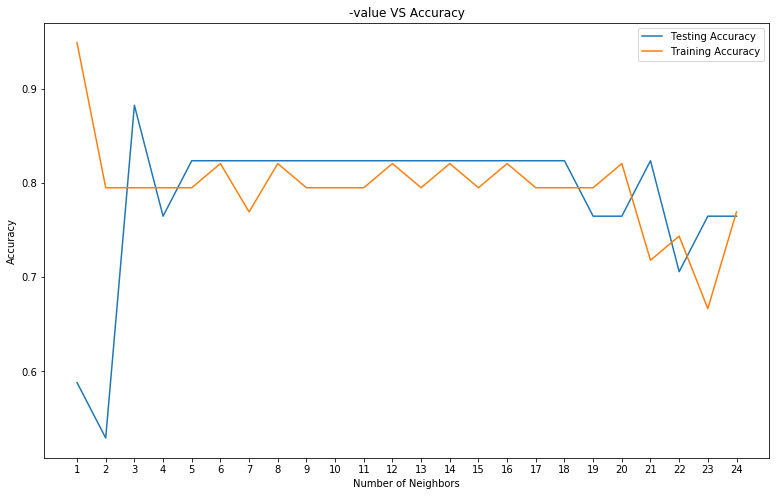

Best accuracy is 0.8823529411764706 with K = 3


In [16]:
# Model complexity
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []
# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [17]:
    # KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = df_parsed.loc[:,df_parsed.columns != 'game_status'], df_parsed.loc[:,'game_status']
knn.fit(x,y)
prediction = knn.predict(x)
print('Prediction: {}'.format(prediction))

Prediction: ['Lose' 'Lose' 'Draw' 'Win' 'Win' 'Win' 'Lose' 'Win' 'Lose' 'Win' 'Win'
 'Lose' 'Lose' 'Win' 'Win' 'Lose' 'Win' 'Lose' 'Win' 'Win' 'Win' 'Win'
 'Win' 'Lose' 'Win' 'Lose' 'Lose' 'Lose' 'Win' 'Lose' 'Win' 'Lose' 'Draw'
 'Lose' 'Lose' 'Win' 'Lose' 'Win' 'Lose' 'Win' 'Win' 'Lose' 'Win' 'Win'
 'Win' 'Lose' 'Lose' 'Lose' 'Win' 'Lose' 'Lose' 'Draw' 'Win' 'Win' 'Win'
 'Win']


In [18]:
df_updated_stats = pd.read_csv(DATA_DIR + 'CleanLoLMatchHistoryUpdate.csv')
df_updated_stats.head()

,level,champion,score,game_mode,kda,creep_score,gold,minutes,date,rank,experience_gained,kills,deaths,assists,game_status
0,8,Thresh,A- / +508 XP,Summoner's Rift,1/0/3,0,4300,15:20,10/17/2018,A-,508,1,0,3,1
1,2,Shen,C,Summoner's Rift,0/0/1,0,737,3:17,10/17/2018,C,0,0,0,1,0
2,16,Heimerdinger,S- / +172 XP,Summoner's Rift,11/0/3,147,11000,25:06:00,10/17/2018,S-,172,11,0,3,1
3,14,Kalista,C / +201 XP,Summoner's Rift,01/07/2004,205,9900,36:12:00,10/17/2018,C,201,1,7,4,-1
4,14,Shen,A- / +172 XP,Summoner's Rift,04/02/2014,105,8900,25:04:00,10/17/2018,A-,172,4,2,14,1


In [19]:
df_updated_parsed = df_updated_stats[['kills','deaths','assists','level','game_status']] 
df_updated_parsed['game_status'] = df_updated_parsed['game_status'].apply(get_status)
df_updated_parsed



/anaconda3/envs/virtual_platform/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,kills,deaths,assists,level,game_status
0,1,0,3,8,Win
1,0,0,1,2,Draw
2,11,0,3,16,Win
3,1,7,4,14,Lose
4,4,2,14,14,Win
5,0,5,8,15,Win
6,6,4,2,10,Lose
7,3,2,5,11,Win
8,7,1,9,16,Win
9,2,8,7,12,Lose


In [20]:
#Predict Updated Data
x_updated,y_updated = df_updated_parsed.loc[:,df_parsed.columns != 'game_status'], df_updated_parsed.loc[:,'game_status']
prediction = knn.predict(x_updated)
print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(x_updated,y_updated)) # accuracy

Prediction: ['Win' 'Draw' 'Win' 'Lose' 'Win' 'Lose' 'Win' 'Win' 'Win' 'Lose' 'Lose'
 'Win' 'Lose']
With KNN (K=3) accuracy is:  0.7692307692307693
